In [1]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import spearmanr


def simulate_game(numbers):
    step = 0
    while len(numbers) > 1:
        step += 1
        a, b = random.sample(list(numbers), 2)
        numbers.remove(a)
        numbers.remove(b)
        diff = abs(a - b)
        numbers.append(diff)
        
        #print(f"Step {step}: Chosen numbers are {a} and {b}. Difference is {diff}. Current list: {numbers}")
    
    return numbers[0]

In [2]:
def simulate_n_games(n, num_range):
    results = []
    for _ in range(n):
        numbers = list(range(1, num_range + 1))
        result = simulate_game(numbers)
        results.append(result)
    return results

In [3]:
results_2024_1 = simulate_n_games(5000, 2024)

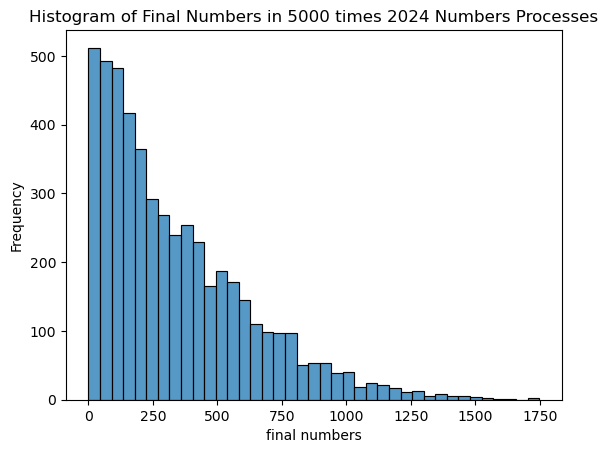

In [8]:
sns.histplot(results_2024_1)
plt.xlabel('final numbers')
plt.title('Histogram of Final Numbers in 5000 times 2024 Numbers Processes')
plt.ylabel('Frequency')
plt.show()

In [15]:
results_2024_2 = simulate_n_games(3000, 2024)

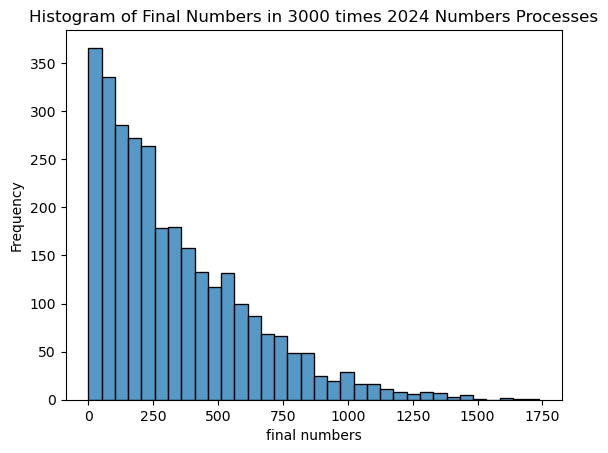

In [9]:
sns.histplot(results_2024_2)
plt.xlabel('final numbers')
plt.title('Histogram of Final Numbers in 3000 times 2024 Numbers Processes')
plt.ylabel('Frequency')
plt.show()

In [5]:
results_2024_3 = simulate_n_games(10000, 2024)

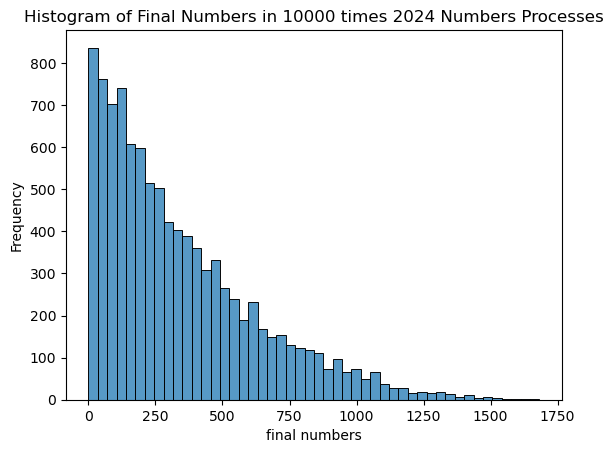

In [11]:
sns.histplot(results_2024_3)
plt.xlabel('final numbers')
plt.title('Histogram of Final Numbers in 10000 times 2024 Numbers Processes')
plt.ylabel('Frequency')
plt.show()

In [4]:
results_2024_4 = simulate_n_games(50000, 2024)

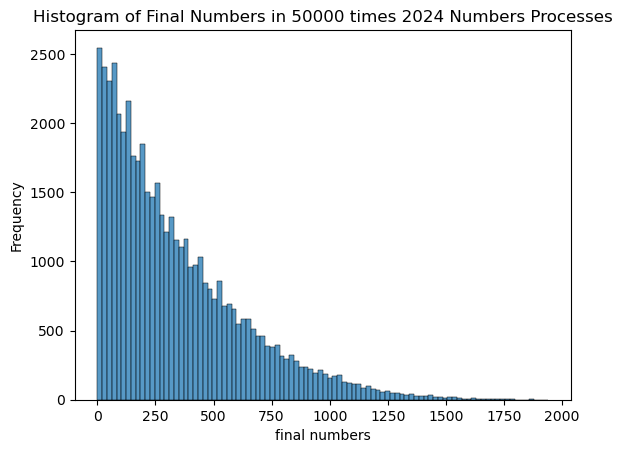

In [22]:
sns.histplot(results_2024_4)
plt.xlabel('final numbers')
plt.title('Histogram of Final Numbers in 50000 times 2024 Numbers Processes')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Calculate the frequency of occurrence of each result
results_freq = pd.value_counts(results_2024_2).sort_index()

# Assign a rank to each outcome and its frequency of occurrence
ranks_results = np.arange(1, len(results_freq) + 1)
ranks_freq = results_freq.rank(ascending=False).values

# Calculate the Spearman rank correlation coefficient
spearman_corr, p_value = spearmanr(ranks_results, ranks_freq)

spearman_corr, p_value

(0.8871307347064186, 1.6727468197678094e-186)

In [19]:
# Calculate the frequency of occurrence of each result
results_freq = pd.value_counts(results_2024_1).sort_index()

# Assign a rank to each outcome and its frequency of occurrence
ranks_results = np.arange(1, len(results_freq) + 1)
ranks_freq = results_freq.rank(ascending=False).values

# Calculate the Spearman rank correlation coefficient
spearman_corr, p_value = spearmanr(ranks_results, ranks_freq)

spearman_corr, p_value

(0.9373469587530504, 1.086032847531971e-279)

In [20]:
# Calculate the frequency of occurrence of each result
results_freq = pd.value_counts(results_2024_3).sort_index()

# Assign a rank to each outcome and its frequency of occurrence
ranks_results = np.arange(1, len(results_freq) + 1)
ranks_freq = results_freq.rank(ascending=False).values

# Calculate the Spearman rank correlation coefficient
spearman_corr, p_value = spearmanr(ranks_results, ranks_freq)

spearman_corr, p_value

(0.9613244011206916, 0.0)

In [21]:
# Calculate the frequency of occurrence of each result
results_freq = pd.value_counts(results_2024_4).sort_index()

# Assign a rank to each outcome and its frequency of occurrence
ranks_results = np.arange(1, len(results_freq) + 1)
ranks_freq = results_freq.rank(ascending=False).values

# Calculate the Spearman rank correlation coefficient
spearman_corr, p_value = spearmanr(ranks_results, ranks_freq)

spearman_corr, p_value

(0.9908599652155493, 0.0)

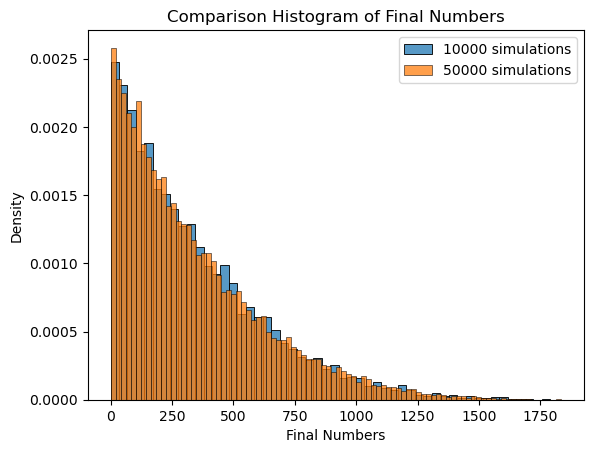

In [6]:
sns.histplot(data=results_2024_3, kde=False, stat="density", element="bars", label="10000 simulations")
sns.histplot(data=results_2024_4, kde=False, stat="density", element="bars", label="50000 simulations")

plt.xlabel('Final Numbers')
plt.title('Comparison Histogram of Final Numbers')
plt.ylabel('Density')
plt.legend()
plt.show()

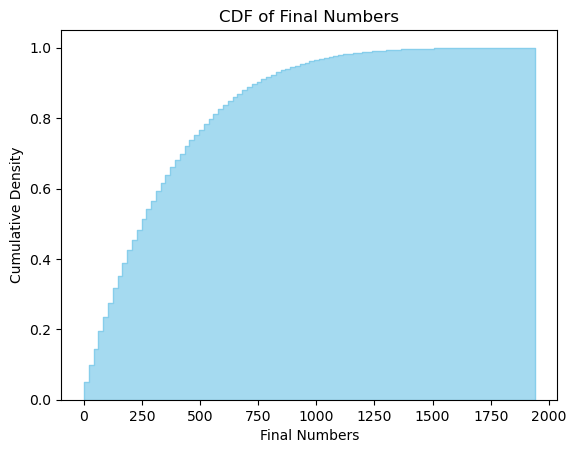

In [45]:
kwargs = {'cumulative': True}

sns.histplot(results_2024_4, stat="density", cumulative=True, fill=True, element="step", color="skyblue")
plt.xlabel('Final Numbers')
plt.title('CDF of Final Numbers')
plt.ylabel('Cumulative Density')

plt.show()

C:\Users\LuYi\AppData\Local\Temp\ipykernel_18128\3745311158.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results_2024_4,norm_hist=True,kde=False,fit=skewnorm)


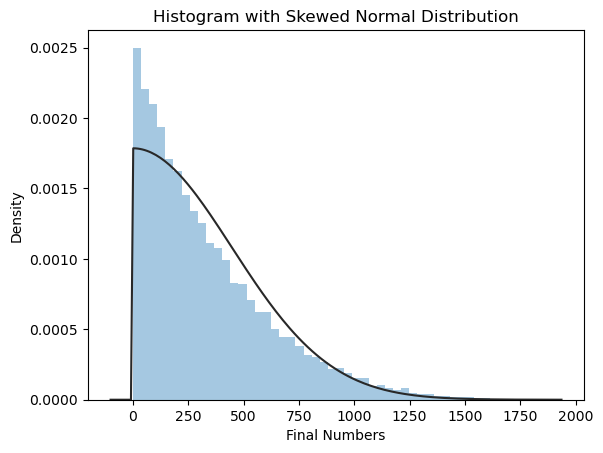

In [12]:
from scipy.stats import skewnorm
sns.distplot(results_2024_4,norm_hist=True,kde=False,fit=skewnorm)
plt.xlabel('Final Numbers')
plt.title('Histogram with Skewed Normal Distribution')
plt.ylabel('Density')
plt.show()

In [16]:
from scipy.stats import kstest, skewnorm

# 拟合对数正态分布以获取参数
shape, loc, scale = skewnorm.fit(results_2024_2)

# K-S 测试
ks_statistic, p_value = kstest(results_2024_2, 'skewnorm', args=(shape, loc, scale))

print(f"K-S statistic: {ks_statistic}, P-value: {p_value}")


K-S statistic: 0.06978839907098372, P-value: 3.773841626370742e-13


C:\Users\LuYi\AppData\Local\Temp\ipykernel_18128\3023649908.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results_2024_4,norm_hist=True,kde=False,fit=gamma)


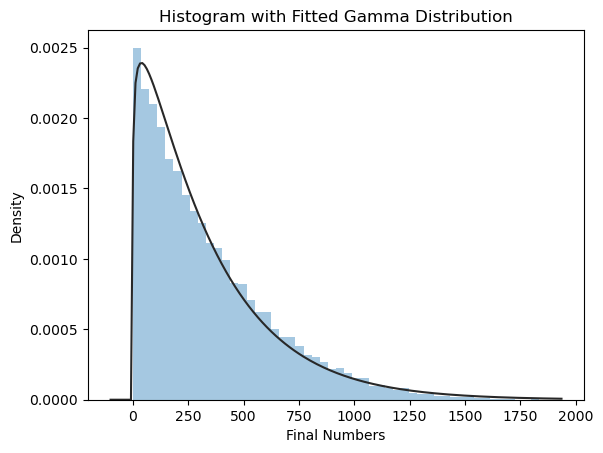

In [25]:
from scipy.stats import gamma, poisson
sns.distplot(results_2024_4,norm_hist=True,kde=False,fit=gamma)
plt.xlabel('Final Numbers')
plt.title('Histogram with Fitted Gamma Distribution')
plt.ylabel('Density')
plt.show()

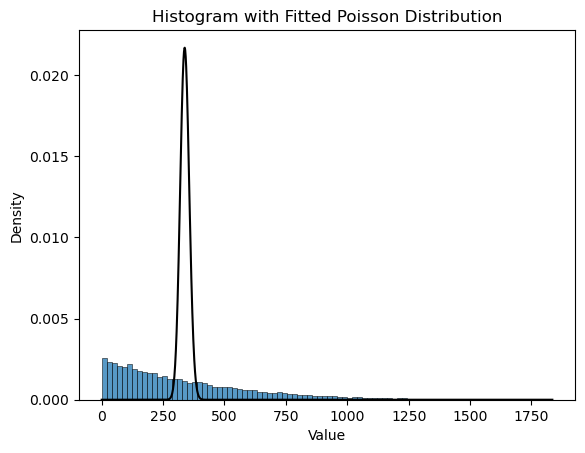

In [24]:
sns.histplot(results_2024_4, kde=False, stat="density")

lambda_param = np.mean(results_2024_4)

x = np.arange(0, np.max(results_2024_4))
pmf_values = poisson.pmf(x, lambda_param)

plt.plot(x, pmf_values,color='black')
plt.title('Histogram with Fitted Poisson Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

plt.show()

In [28]:
from scipy import stats

a, loc, scale = stats.gamma.fit(results_2024_2)

ks_statistic, p_value = stats.kstest(results_2024_2, 'gamma', args=(a, loc, scale))

print(f"K-S statistic: {ks_statistic}, P-value: {p_value}")

K-S statistic: 0.022803241547097897, P-value: 0.08696972653115043


In [33]:
min_value = np.min(results_2024_2)
max_value = np.max(results_2024_2)

print(f"Minimum value: {min_value}, Maximum value: {max_value}")

Minimum value: 0, Maximum value: 1686


In [34]:
min_value = np.min(results_2024_3)
max_value = np.max(results_2024_3)

print(f"Minimum value: {min_value}, Maximum value: {max_value}")

Minimum value: 0, Maximum value: 1790


In [35]:
min_value = np.min(results_2024_4)
max_value = np.max(results_2024_4)

print(f"Minimum value: {min_value}, Maximum value: {max_value}")

Minimum value: 0, Maximum value: 1836


In [36]:
min_value = np.min(results_2024_1)
max_value = np.max(results_2024_1)

print(f"Minimum value: {min_value}, Maximum value: {max_value}")

Minimum value: 0, Maximum value: 1728


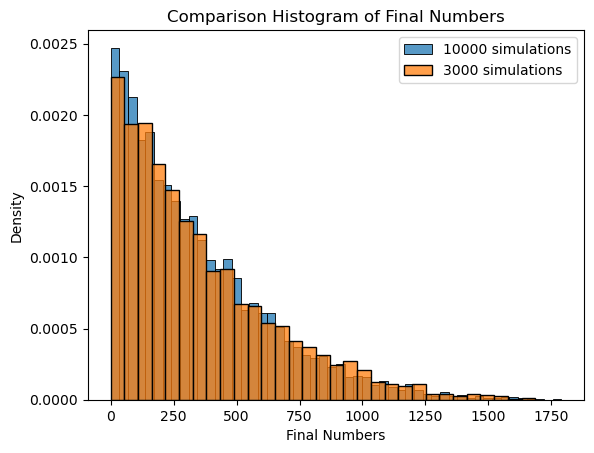

In [37]:
sns.histplot(data=results_2024_3, kde=False, stat="density", element="bars", label="10000 simulations")
sns.histplot(data=results_2024_2, kde=False, stat="density", element="bars", label="3000 simulations")

plt.xlabel('Final Numbers')
plt.title('Comparison Histogram of Final Numbers')
plt.ylabel('Density')
plt.legend()
plt.show()

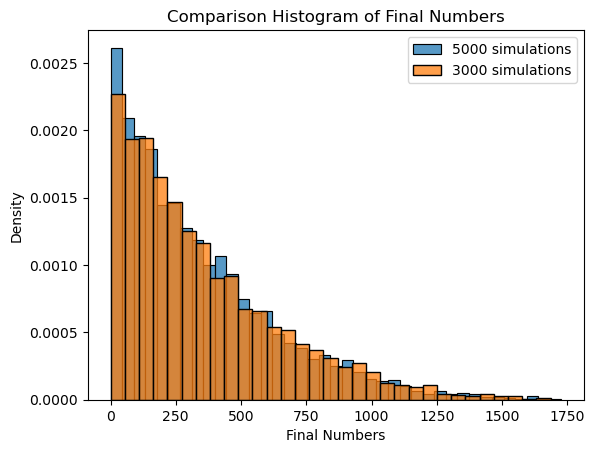

In [38]:
sns.histplot(data=results_2024_1, kde=False, stat="density", element="bars", label="5000 simulations")
sns.histplot(data=results_2024_2, kde=False, stat="density", element="bars", label="3000 simulations")

plt.xlabel('Final Numbers')
plt.title('Comparison Histogram of Final Numbers')
plt.ylabel('Density')
plt.legend()
plt.show()

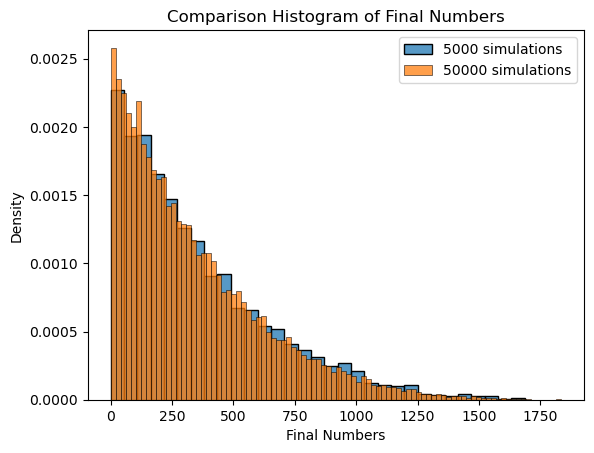

In [39]:
sns.histplot(data=results_2024_2, kde=False, stat="density", element="bars", label="5000 simulations")
sns.histplot(data=results_2024_4, kde=False, stat="density", element="bars", label="50000 simulations")

plt.xlabel('Final Numbers')
plt.title('Comparison Histogram of Final Numbers')
plt.ylabel('Density')
plt.legend()
plt.show()